In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [112]:
data = pd.read_excel("Realized Schedule 20210101-20220208.xlsx", parse_dates = True)
data = data.sort_values(by = "ScheduleTime").reset_index(drop = True)
data

,ScheduleTime,Airline,FlightNumber,Destination,AircraftType,FlightType,Sector,SeatCapacity,LoadFactor
0,2021-01-01 06:05:00,CL,2707,YAD,73H,J,CA,189,0.026455
1,2021-01-01 06:35:00,IA,874,DEN,73W,J,US,142,0.408451
2,2021-01-01 08:20:00,LJ,2831,DFW,320,J,US,186,0.139785
3,2021-01-01 10:35:00,JZ,818,YHM,AT7,J,CA,74,0.189189
4,2021-01-01 12:05:00,IA,876,DEN,73W,J,US,142,0.570423
...,...,...,...,...,...,...,...,...,...
36765,2022-02-08 21:40:00,CL,1496,ICL,7M8,J,US,197,0.406091
36766,2022-02-08 22:00:00,LJ,2396,YKA,320,J,CA,180,0.577778
36767,2022-02-08 22:40:00,CL,2961,YQU,7M8,J,CA,200,0.265000
36768,2022-02-08 22:50:00,CL,1392,YQL,73H,J,CA,189,0.322751


In [125]:
# holidays 
from pandas.tseries.holiday import *
from pandas.tseries.offsets import CustomBusinessDay

class GothamBusinessCalendar(AbstractHolidayCalendar):
   rules = [
     Holiday('New Year', month=1, day=1, observance=sunday_to_monday),
     Holiday('Groundhog Day', month=1, day=6, observance=sunday_to_monday),
     Holiday('St. Patricks Day', month=3, day=17, observance=sunday_to_monday),
     Holiday('April Fools Day', month=4, day=1),
     Holiday('Good Friday', month=1, day=1, offset=[Easter(), Day(-2)]),
     Holiday('Labor Day', month=5, day=1, observance=sunday_to_monday),
     Holiday('Canada Day', month=7, day=1, observance=sunday_to_monday),
     Holiday('July 4th', month=7, day=4, observance=nearest_workday),
     Holiday('All Saints Day', month=11, day=1, observance=sunday_to_monday),
     Holiday('Christmas', month=12, day=25, observance=nearest_workday)
   ]

Gotham_BD = CustomBusinessDay(calendar=GothamBusinessCalendar())

# add time stuff
data["Hour"] = data.ScheduleTime.dt.hour
data["Date"] = data.ScheduleTime.dt.date
data["Holiday"] = data.Date.isin(pd.date_range(min(data.Date), end=max(data.Date), freq=Gotham_BD)) == False
data["Weekday"] = data.ScheduleTime.dt.day_name()

data["QuarterEnd"] = data.ScheduleTime.dt.to_period("Q").dt.end_time
data["MonthEnd"] = data.ScheduleTime.dt.to_period("M").dt.end_time
# data["BusinessMonthEnd"] = data.ScheduleTime.dt.to_period("BM").dt.end_time
data["TimeToQuarterEnd"] = (data["QuarterEnd"] - data["ScheduleTime"]).dt.days
data["TimeToMonthEnd"] = (data["MonthEnd"] - data["ScheduleTime"]).dt.days
# data["TimeToBusinessMonthEnd"] = (data["BusinessMonthEnd"] - data["ScheduleTime"]).dt.days
data

c:\Users\lukas\Git\Studie\02582_Computational_Data_Analysis\CDA-case-env\lib\site-packages\pandas\core\algorithms.py:521: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return f(comps, values)


,ScheduleTime,Airline,FlightNumber,Destination,AircraftType,FlightType,Sector,SeatCapacity,LoadFactor,Hour,Date,Holiday,Weekday,QuarterEnd,MonthEnd,TimeToQuarterEnd,TimeToMonthEnd
0,2021-01-01 06:05:00,CL,2707,YAD,73H,J,CA,189,0.026455,6,2021-01-01,True,Friday,2021-03-31 23:59:59.999999999,2021-01-31 23:59:59.999999999,89,30
1,2021-01-01 06:35:00,IA,874,DEN,73W,J,US,142,0.408451,6,2021-01-01,True,Friday,2021-03-31 23:59:59.999999999,2021-01-31 23:59:59.999999999,89,30
2,2021-01-01 08:20:00,LJ,2831,DFW,320,J,US,186,0.139785,8,2021-01-01,True,Friday,2021-03-31 23:59:59.999999999,2021-01-31 23:59:59.999999999,89,30
3,2021-01-01 10:35:00,JZ,818,YHM,AT7,J,CA,74,0.189189,10,2021-01-01,True,Friday,2021-03-31 23:59:59.999999999,2021-01-31 23:59:59.999999999,89,30
4,2021-01-01 12:05:00,IA,876,DEN,73W,J,US,142,0.570423,12,2021-01-01,True,Friday,2021-03-31 23:59:59.999999999,2021-01-31 23:59:59.999999999,89,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36765,2022-02-08 21:40:00,CL,1496,ICL,7M8,J,US,197,0.406091,21,2022-02-08,True,Tuesday,2022-03-31 23:59:59.999999999,2022-02-28 23:59:59.999999999,51,20
36766,2022-02-08 22:00:00,LJ,2396,YKA,320,J,CA,180,0.577778,22,2022-02-08,True,Tuesday,2022-03-31 23:59:59.999999999,2022-02-28 23:59:59.999999999,51,20
36767,2022-02-08 22:40:00,CL,2961,YQU,7M8,J,CA,200,0.265000,22,2022-02-08,True,Tuesday,2022-03-31 23:59:59.999999999,2022-02-28 23:59:59.999999999,51,20
36768,2022-02-08 22:50:00,CL,1392,YQL,73H,J,CA,189,0.322751,22,2022-02-08,True,Tuesday,2022-03-31 23:59:59.999999999,2022-02-28 23:59:59.999999999,51,20


In [124]:
pd.date_range("2021-01-01", end="2022-03-31", freq=Gotham_BD)

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-07', '2021-01-08',
               '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14',
               '2021-01-15', '2021-01-18',
               ...
               '2022-03-18', '2022-03-21', '2022-03-22', '2022-03-23',
               '2022-03-24', '2022-03-25', '2022-03-28', '2022-03-29',
               '2022-03-30', '2022-03-31'],
              dtype='datetime64[ns]', length=314, freq='C')

0.0    404
Name: Holiday, dtype: int64

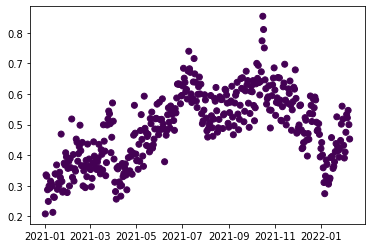

In [121]:
d = data.groupby("Date").mean()
plt.scatter(d.index, d.LoadFactor, c = d.Holiday)
d.Holiday.value_counts()

In [117]:
d[d.Holiday == 1]

,FlightNumber,SeatCapacity,LoadFactor,Hour,Holiday,TimeToQuarterEnd,TimeToMonthEnd
Date,,,,,,,
2021-11-24,1101.150376,146.789474,0.548127,13.045113,1.0,37.0,6.0


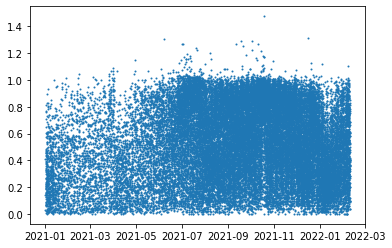

In [99]:
plt.scatter(data.ScheduleTime, data.LoadFactor, s = 1)
# data.groupby("Holiday").mean()

# fig, ax = plt.subplots(1,2, sharex = True)
# ax[0].hist(data.LoadFactor[data.Holiday], bins = 50, alpha = 1)
# ax[1].hist(data.LoadFactor[data.Holiday != True], bins = 50, alpha = 1)
# plt.show()

## Some metrics

In [95]:
data.Airline.value_counts()
data.Sector.value_counts()
# data.FlightType.value_counts()

CA    17906
US    17575
IS      450
QA      345
AE      165
DK       95
SG       95
EG       88
CN       44
IQ        3
NL        1
MX        1
Name: Sector, dtype: int64

In [48]:
data[data.Sector == "DK"]

,ScheduleTime,Airline,FlightNumber,Destination,AircraftType,FlightType,Sector,SeatCapacity,LoadFactor
536,2021-01-13 11:25:00,DO,811,CPH,333,J,DK,262,0.145038
764,2021-01-21 12:25:00,DO,811,CPH,333,J,DK,262,0.030534
922,2021-01-28 11:15:00,DO,811,CPH,333,J,DK,262,0.030534
987,2021-01-31 12:00:00,DO,811,CPH,333,J,DK,262,0.045802
1056,2021-02-03 11:25:00,DO,811,CPH,333,J,DK,262,0.030534
...,...,...,...,...,...,...,...,...,...
35657,2022-01-30 13:00:00,DO,811,CPH,333,J,DK,262,0.099237
35783,2022-01-31 12:35:00,DO,811,CPH,333,J,DK,262,0.068702
36342,2022-02-05 12:05:00,DO,811,CPH,333,J,DK,262,0.194656
36449,2022-02-06 12:30:00,DO,811,CPH,333,J,DK,262,0.141221


In [41]:
# data = data_org.copy()
X = data.loc[:,:"SeatCapacity"]
y = data["LoadFactor"]

X

,ScheduleTime,Airline,FlightNumber,Destination,AircraftType,FlightType,Sector,SeatCapacity
0,2021-01-01 06:05:00,CL,2707,YAD,73H,J,CA,189
1,2021-01-01 06:35:00,IA,874,DEN,73W,J,US,142
2,2021-01-01 08:20:00,LJ,2831,DFW,320,J,US,186
3,2021-01-01 10:35:00,JZ,818,YHM,AT7,J,CA,74
4,2021-01-01 12:05:00,IA,876,DEN,73W,J,US,142
...,...,...,...,...,...,...,...,...
36765,2022-02-08 21:40:00,CL,1496,ICL,7M8,J,US,197
36766,2022-02-08 22:00:00,LJ,2396,YKA,320,J,CA,180
36767,2022-02-08 22:40:00,CL,2961,YQU,7M8,J,CA,200
36768,2022-02-08 22:50:00,CL,1392,YQL,73H,J,CA,189


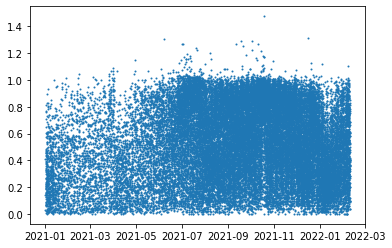

In [26]:
plt.scatter(data.ScheduleTime, data.LoadFactor, s = 1)